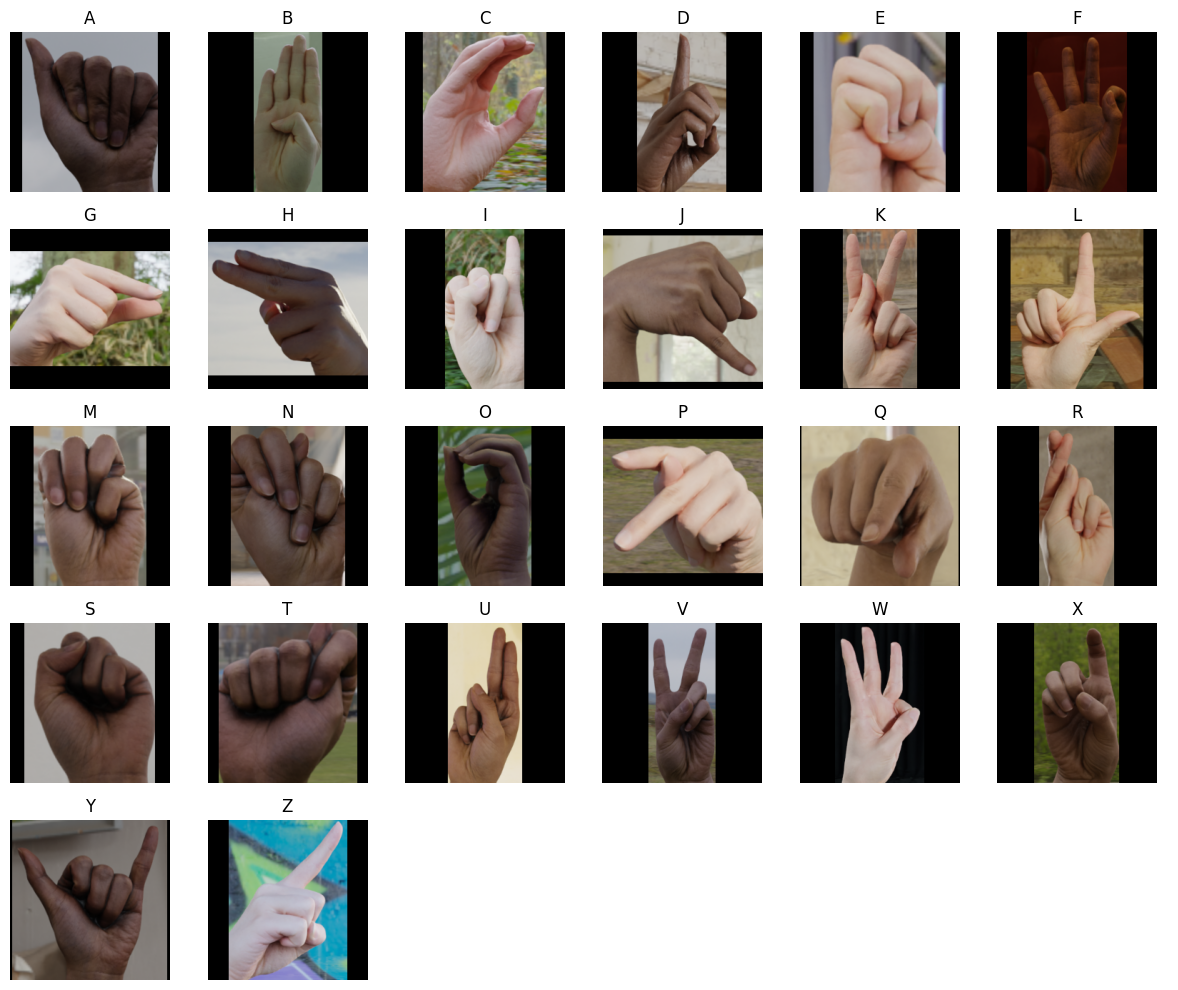

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

DATASET_PATH = "processed_dataset/train"

CLASS_NAMES = sorted(
    [
        d
        for d in os.listdir(DATASET_PATH)
        if os.path.isdir(os.path.join(DATASET_PATH, d))
    ]
)

sample_images = {}

# find one image per class
for class_name in CLASS_NAMES:
    class_dir = os.path.join(DATASET_PATH, class_name)

    image_files = [
        f
        for f in os.listdir(class_dir)
        if f.lower().endswith((".jpg", ".png", ".jpeg"))
    ]

    if image_files:
        sample_images[class_name] = os.path.join(
            class_dir, image_files[random.randint(0, len(image_files) - 1)]
        )  # pick the first image

# display the images
fig, axes = plt.subplots(5, 6, figsize=(12, 10))
axes = axes.flatten()

for idx, (class_name, img_path) in enumerate(sample_images.items()):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[idx].imshow(img)
    axes[idx].set_title(class_name.upper())
    axes[idx].axis("off")

for i in range(len(sample_images), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()